<a href="https://colab.research.google.com/github/froggyroot/2024bootcamp/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EA%B8%B0%EB%A7%901.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# 모듈 호출
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd

# 국립공원 기본통계 (출처: KOSIS 국가통계포털)
df = pd.read_csv('NLPRK_STA.csv', encoding='cp949')
df.head()

,공원명,육지면적,탐방객수
0,지리산,483.022,3308833
1,경주,136.550,2887634
2,계룡산,65.335,1817602
3,한려해상,127.188,6439653
4,설악산,398.237,3241484


In [59]:
sns.set(style='whitegrid', font='KoPubDotum', font_scale=1.2) # Seaborn 설정

In [60]:
# 국립공원 육지면적, 탐방객수
X = df.iloc[:, [1, 2]].values # shape=(22, 2)
m=X.shape[0] # 집합 개수 (m=22)
n=X.shape[1] # 특징 개수 (n=2)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13218 (\N{SQUARE KM SQUARED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

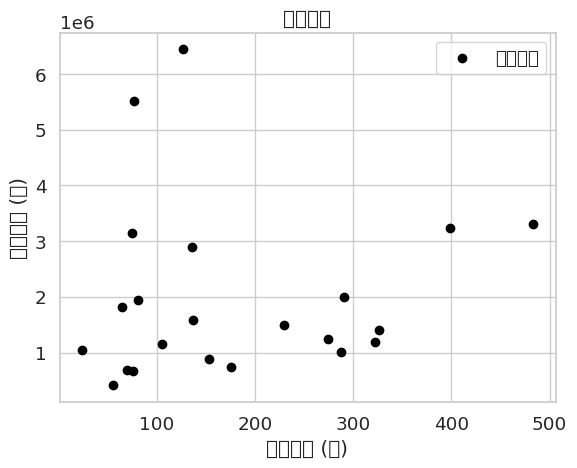

In [61]:
plt.scatter(X[:,0],X[:,1],c='black',label='국립공원')
plt.xlabel('육지면적 (㎢)')
plt.ylabel('탐방객수 (명)')
plt.legend()
plt.title('국립공원')
plt.show()

In [70]:
K=3 # 클러스터 개수
n_iter=100 # 반복 횟수
Centroids=np.array([]).reshape(n,0) # 클러스터 중심 초기화
Centroids # shape=(2, 0)

array([], shape=(2, 0), dtype=float64)

In [71]:
for i in range(K): # 0, 1, 2
    rand=rd.randint(0,m-1) # 0과 21 사이 난수 생성
    Centroids=np.c_[Centroids,X[rand]] # 클러스터 중심(열) 추가
Centroids # K개 클러스터 중심 초기값. shape=(2, 3)

array([[7.005200e+01, 1.367070e+02, 6.533500e+01],
       [6.800680e+05, 1.579089e+06, 1.817602e+06]])

In [72]:
Output={} # 출력값 초기화(딕셔너리)

In [73]:
# 유클리드 거리 초기화
EuclidianDistance=np.array([]).reshape(m,0)
EuclidianDistance # shape=(22, 0)

array([], shape=(22, 0), dtype=float64)

In [74]:
Centroids[:,0] # shape=(2,)

array([7.00520e+01, 6.80068e+05])

In [75]:
# 넘파이 브로드캐스트(broadcast): 형상이 다른 배열끼리도 계산 가능
# (22, 2) 행렬 A에서 (2,) 벡터 값을 차감하면, 벡터 값은 (22, 2) 행렬로 확대된 후 연산
tempDist = np.sum((X-Centroids[:,0])**2,axis=1)
tempDist # shape=(22,)

array([6.91040560e+12, 4.87334765e+12, 1.29398360e+12, 3.31728194e+13,
       6.56085203e+12, 3.18983268e+11, 4.48376459e+10, 1.60921403e+12,
       5.13659275e+07, 6.74431878e+11, 5.17034406e+11, 2.25620251e+11,
       1.36830451e+11, 1.71006365e+12, 2.34105016e+13, 3.39890115e+09,
       1.12040873e+11, 2.64111774e+11, 8.08238763e+11, 7.35158152e+10,
       6.06987189e+12, 0.00000000e+00])

In [76]:
np.c_[EuclidianDistance,tempDist] # (22, 0) 행렬에 (22,) 옆으로 붙이기

array([[6.91040560e+12],
       [4.87334765e+12],
       [1.29398360e+12],
       [3.31728194e+13],
       [6.56085203e+12],
       [3.18983268e+11],
       [4.48376459e+10],
       [1.60921403e+12],
       [5.13659275e+07],
       [6.74431878e+11],
       [5.17034406e+11],
       [2.25620251e+11],
       [1.36830451e+11],
       [1.71006365e+12],
       [2.34105016e+13],
       [3.39890115e+09],
       [1.12040873e+11],
       [2.64111774e+11],
       [8.08238763e+11],
       [7.35158152e+10],
       [6.06987189e+12],
       [0.00000000e+00]])

In [77]:
for k in range(K): # 0, 1, 2
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
EuclidianDistance # shape=(22, 3)

array([[6.91040560e+12, 2.99201443e+12, 2.22377007e+12],
       [4.87334765e+12, 1.71229002e+12, 1.14496849e+12],
       [1.29398360e+12, 5.68884563e+10, 0.00000000e+00],
       [3.31728194e+13, 2.36250824e+13, 2.13633555e+13],
       [6.56085203e+12, 2.76355720e+12, 2.02744006e+12],
       [3.18983268e+11, 1.11713054e+11, 3.28040315e+11],
       [4.48376459e+10, 4.72342802e+11, 8.57077874e+11],
       [1.60921403e+12, 1.36550207e+11, 1.71646684e+10],
       [5.13659275e+07, 8.21176695e+11, 1.31034038e+12],
       [6.74431878e+11, 6.05020369e+09, 1.00043187e+11],
       [5.17034406e+11, 3.23892369e+10, 1.75128089e+11],
       [2.25620251e+11, 1.79798050e+11, 4.38957928e+11],
       [1.36830451e+11, 2.79962696e+11, 5.89252748e+11],
       [1.71006365e+12, 1.67013645e+11, 2.89544765e+10],
       [2.34105016e+13, 1.55190221e+13, 1.36967052e+13],
       [3.39890115e+09, 7.06811801e+11, 1.16474604e+12],
       [1.12040873e+11, 3.18429998e+11, 6.44502340e+11],
       [2.64111774e+11, 1.48304

In [78]:
# 유클리드 거리가 최소가 되는 색인
np.argmin(EuclidianDistance,axis=1)

array([2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0])

In [79]:
# K 클러스터 저장
C=np.argmin(EuclidianDistance,axis=1)+1
C # shape=(22,)

array([3, 3, 3, 3, 3, 2, 1, 3, 1, 2, 2, 2, 1, 3, 3, 1, 1, 2, 2, 1, 3, 1])

In [80]:
Y={} # 출력값 임시 딕셔너리

for k in range(K): # 0, 1, 2
    Y[k+1]=np.array([]).reshape(2,0) # 특징 개수
Y

{1: array([], shape=(2, 0), dtype=float64),
 2: array([], shape=(2, 0), dtype=float64),
 3: array([], shape=(2, 0), dtype=float64)}

In [81]:
# 출력값 임시 딕셔너리 갱신
Y[C[0]]=np.c_[Y[C[0]],X[0]] # C[0] 키 값에 대한 재귀적 갱신
Y[C[0]]

array([[4.830220e+02],
       [3.308833e+06]])

In [82]:
# 출력값 임시 딕셔너리: 키 값에 대한 재귀적 갱신
for i in range(m): # m=22
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
Y

{1: array([[1.533320e+02, 7.625600e+01, 2.422300e+01, 1.756680e+02,
         2.875710e+02, 5.622000e+01, 7.005200e+01],
        [8.918170e+05, 6.729010e+05, 1.049974e+06, 7.383680e+05,
         1.014793e+06, 4.089300e+05, 6.800680e+05]]),
 2: array([[2.747660e+02, 2.294300e+02, 3.263480e+02, 1.055950e+02,
         3.220110e+02, 1.367070e+02],
        [1.244854e+06, 1.501306e+06, 1.399119e+06, 1.155063e+06,
         1.193986e+06, 1.579089e+06]]),
 3: array([[4.830220e+02, 4.830220e+02, 1.365500e+02, 6.533500e+01,
         1.271880e+02, 3.982370e+02, 8.070800e+01, 2.910230e+02,
         7.692200e+01, 7.542500e+01],
        [3.308833e+06, 3.308833e+06, 2.887634e+06, 1.817602e+06,
         6.439653e+06, 3.241484e+06, 1.948616e+06, 1.987762e+06,
         5.518508e+06, 3.143779e+06]])}

In [83]:
Y[1] # shape=(10, 2)

array([[1.533320e+02, 7.625600e+01, 2.422300e+01, 1.756680e+02,
        2.875710e+02, 5.622000e+01, 7.005200e+01],
       [8.918170e+05, 6.729010e+05, 1.049974e+06, 7.383680e+05,
        1.014793e+06, 4.089300e+05, 6.800680e+05]])

In [84]:
Y[1].T # 전치행렬: shape=(2, 10)

array([[1.533320e+02, 8.918170e+05],
       [7.625600e+01, 6.729010e+05],
       [2.422300e+01, 1.049974e+06],
       [1.756680e+02, 7.383680e+05],
       [2.875710e+02, 1.014793e+06],
       [5.622000e+01, 4.089300e+05],
       [7.005200e+01, 6.800680e+05]])

In [85]:
# 출력값 임시 디렉터리: 전치행렬
for k in range(K): # 0, 1, 2
    Y[k+1]=Y[k+1].T
Y

{1: array([[1.533320e+02, 8.918170e+05],
        [7.625600e+01, 6.729010e+05],
        [2.422300e+01, 1.049974e+06],
        [1.756680e+02, 7.383680e+05],
        [2.875710e+02, 1.014793e+06],
        [5.622000e+01, 4.089300e+05],
        [7.005200e+01, 6.800680e+05]]),
 2: array([[2.747660e+02, 1.244854e+06],
        [2.294300e+02, 1.501306e+06],
        [3.263480e+02, 1.399119e+06],
        [1.055950e+02, 1.155063e+06],
        [3.220110e+02, 1.193986e+06],
        [1.367070e+02, 1.579089e+06]]),
 3: array([[4.830220e+02, 3.308833e+06],
        [4.830220e+02, 3.308833e+06],
        [1.365500e+02, 2.887634e+06],
        [6.533500e+01, 1.817602e+06],
        [1.271880e+02, 6.439653e+06],
        [3.982370e+02, 3.241484e+06],
        [8.070800e+01, 1.948616e+06],
        [2.910230e+02, 1.987762e+06],
        [7.692200e+01, 5.518508e+06],
        [7.542500e+01, 3.143779e+06]])}

In [86]:
for k in range(K): # 0, 1, 2
     Centroids[:,k]=np.mean(Y[k+1],axis=0)
Centroids

array([[1.20474571e+02, 2.32476167e+02, 2.21743200e+02],
       [7.79550143e+05, 1.34556950e+06, 3.36027040e+06]])

In [87]:
for i in range(n_iter): # n_iter 반복 횟수
    # 유클리드 거리가 최소가 되는 K 클러스터 할당
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1) # shape=(22,)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist] # shape=(22, 3)
    C=np.argmin(EuclidianDistance,axis=1)+1 # shape=(22,)
    # K 클러스터 갱신
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0) # Y 딕셔너리 키, 값 할당
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]] # Y 딕셔너리 키(K클러스터), 값(육지면적, 탐방객수) 할당
    for k in range(K):
        Y[k+1]=Y[k+1].T # 전치행렬
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0) # K 클러스터 중심 갱신
    Output=Y

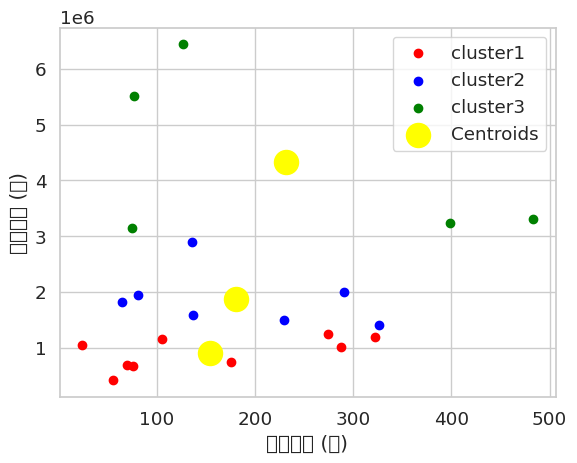

In [88]:
# K-평균 클러스터링 결과 가시화
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('육지면적 (㎢)')
plt.ylabel('탐방객수 (명)')
plt.legend()
plt.show()
